
# Data Science Assignment: Exploring Documentation and Data Analysis Tools

In this assignment, you will explore three essential tools for data analysis in Python:
- **Pandas**
- **Matplotlib**
- One more Python data science package of your choice (e.g., `seaborn`, `scikit-learn`, `numpy`, etc.)

## Objectives:
1. **Research**: You will read the documentation for these libraries and explore some new or interesting features.
2. **Implementation**: You will demonstrate 5 different techniques or functionalities you have learned by analyzing a dataset of your choice.

### Steps:
1. **Explore the Pandas Documentation**: Visit the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/). Look for interesting or new features that you have not yet explored. Examples could include handling missing data, merging data, or using advanced group-by functions.

2. **Explore the Matplotlib Documentation**: Visit the [Matplotlib Documentation](https://matplotlib.org/stable/contents.html). Look for advanced visualization techniques that will help you visualize your data.

3. **Select Another Library**: Choose another data science library you are interested in, such as `seaborn`, `scikit-learn`, or `numpy`. Visit its documentation, learn something new, and apply it to your dataset.

### Requirements:
- **Markdown Documentation**: For each technique or method you implement, explain what it does and why you chose it in a markdown cell before each code block.
- **Code Implementation**: After the markdown explanation, provide a code block where you implement the feature with your dataset.



### Example Dataset
You are free to use any dataset of your choice. If you don't have one, you can download some popular datasets from websites like [Kaggle](https://www.kaggle.com/datasets) or use in-built datasets in Python libraries like [seaborn](https://www.geeksforgeeks.org/seaborn-datasets-for-data-science/) or [sklearn](https://scikit-learn.org/1.5/datasets/real_world.html).


----

# Exploratory Data Analysis and Data Visualization of Pokemon

### Dataset: Pokemon from Kaggle
The Pokemon dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. Information included in the dataset includes Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/  

### Why I chose this dataset
I chose this dataset so that I could learn more about Pokemon in addition to the Pandas, Matplotlib, and Seaborn packages in Python. My 9-year-old will not. stop. talking about Pokemon. In the car, at the dinner table, when I tuck him into bed; there is NO Pokemon-free time in our home! I hope to use this dataset to learn more about data analysis tools and get some cool-mom points, too.


#### **First things first:** import the required Python packages
- Pandas
- Matplotlib
- Seaborn

...as well as

- Kagglehub (for dataset import)

In [1]:
# Import necessary libraries for assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# This code was provided from KaggleHub to download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/pokemon")

print("Path to dataset files:", path)

Path to dataset files: /Users/ambermocalis/.cache/kagglehub/datasets/rounakbanik/pokemon/versions/1


In [5]:
# Add file name to path to create absolute path when reading dataset into Dataframe
path = path + '/pokemon.csv'

# Reading the Pokemon dataset into a DataFrame
try:
    df = pd.read_csv(path)
    # Do some operations with the file
except FileNotFoundError:
    print('File not found.')



#### Exploratory Data Analysis (EDA) 
EDA to help me better understand what is in the dataset.

In [6]:
# Analyze the dataset to create baseline understanding

print('Pokemon Dataframe shape:')
print(df.shape) # Display the dataframe shape
print("*"*100)

print('Missing data:')
print(df.isnull().sum()) # Display the dataframe shape
print("*"*100)

print('Pokemon Attributes:')
print(df.columns) # Display the dataframe shape
print("*"*100)

print('Pokemon Dataframe preview:')
print(df.head()) # Display the first 5 rows of the Dataframe
print("*"*100)



Pokemon Dataframe shape:
(801, 41)
****************************************************************************************************
Missing data:
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0


### Cleaning the Dataset

### Re-order Pokemon attribute columns

I noticed that the columns have been organized alphabetically by attribute, which isn't very helpful for me to preview the dataframe. I dropped columns I won't use for this project and re-ordered the remaining columns. I consulted my son and husband for this step.

In [7]:
# Drop columns that will not be used for this project
df=df.drop(['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'experience_growth',
       'percentage_male', 'height_m', 'weight_kg'],axis=1)

df.head(10)


,abilities,attack,classfication,defense,hp,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,Seed Pokémon,49,45,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",62,Seed Pokémon,63,60,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",100,Seed Pokémon,123,80,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",52,Lizard Pokémon,43,39,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",64,Flame Pokémon,58,58,Lizardoリザード,Charmeleon,5,80,65,80,fire,NaN,1,0
5,"['Blaze', 'Solar Power']",104,Flame Pokémon,78,78,Lizardonリザードン,Charizard,6,159,115,100,fire,flying,1,0
6,"['Torrent', 'Rain Dish']",48,Tiny Turtle Pokémon,65,44,Zenigameゼニガメ,Squirtle,7,50,64,43,water,NaN,1,0
7,"['Torrent', 'Rain Dish']",63,Turtle Pokémon,80,59,Kameilカメール,Wartortle,8,65,80,58,water,NaN,1,0
8,"['Torrent', 'Rain Dish']",103,Shellfish Pokémon,120,79,Kamexカメックス,Blastoise,9,135,115,78,water,NaN,1,0
9,"['Shield Dust', 'Run Away']",30,Worm Pokémon,35,45,Caterpieキャタピー,Caterpie,10,20,20,45,bug,NaN,1,0


In [10]:
# Re-order columns and update csv file for future referencing
new_order = ['pokedex_number', 'name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
            'classfication', 'generation', 'is_legendary', 'abilities', 'japanese_name']

df = df[new_order]

df.to_csv('reordered_pokemon.csv', index=False)

df.head(10)



,pokedex_number,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,classfication,generation,is_legendary,abilities,japanese_name
0,1,Bulbasaur,grass,poison,45,49,49,65,65,45,Seed Pokémon,1,0,"['Overgrow', 'Chlorophyll']",Fushigidaneフシギダネ
1,2,Ivysaur,grass,poison,60,62,63,80,80,60,Seed Pokémon,1,0,"['Overgrow', 'Chlorophyll']",Fushigisouフシギソウ
2,3,Venusaur,grass,poison,80,100,123,122,120,80,Seed Pokémon,1,0,"['Overgrow', 'Chlorophyll']",Fushigibanaフシギバナ
3,4,Charmander,fire,NaN,39,52,43,60,50,65,Lizard Pokémon,1,0,"['Blaze', 'Solar Power']",Hitokageヒトカゲ
4,5,Charmeleon,fire,NaN,58,64,58,80,65,80,Flame Pokémon,1,0,"['Blaze', 'Solar Power']",Lizardoリザード
5,6,Charizard,fire,flying,78,104,78,159,115,100,Flame Pokémon,1,0,"['Blaze', 'Solar Power']",Lizardonリザードン
6,7,Squirtle,water,NaN,44,48,65,50,64,43,Tiny Turtle Pokémon,1,0,"['Torrent', 'Rain Dish']",Zenigameゼニガメ
7,8,Wartortle,water,NaN,59,63,80,65,80,58,Turtle Pokémon,1,0,"['Torrent', 'Rain Dish']",Kameilカメール
8,9,Blastoise,water,NaN,79,103,120,135,115,78,Shellfish Pokémon,1,0,"['Torrent', 'Rain Dish']",Kamexカメックス
9,10,Caterpie,bug,NaN,45,30,35,20,20,45,Worm Pokémon,1,0,"['Shield Dust', 'Run Away']",Caterpieキャタピー



## Task 1: Pandas Documentation

Research and choose two interesting functions or techniques from the Pandas documentation that are useful for data analysis. You may explore new ways to handle missing data, merge datasets, or advanced grouping techniques.



### Grouping in Python:
- **Pandas Method**: `pd.groupby()` - This function is used to group the Pokemon by type.
- **Why I chose this**: To prepare for later visualization, I wanted to group Pokemon by type and aggregated attributes, then write the table to a dataframe.

In [11]:
# Task 1: Pandas Technique 1 - Grouping

types = df.groupby('type1').agg(
    num_pokemon=('name', 'count')).reset_index()

types = types.sort_values(by='num_pokemon', ascending=False)

print(types)

       type1  num_pokemon
17     water          114
12    normal          105
9      grass           78
0        bug           72
14   psychic           53
6       fire           52
15      rock           45
3   electric           39
10    ground           32
13    poison           32
1       dark           29
5   fighting           28
8      ghost           27
2     dragon           27
16     steel           24
11       ice           23
4      fairy           18
7     flying            3


In [12]:
df_summary = df.describe()
df_summary

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,401.000000,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,3.690387,0.087391
std,231.373075,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.930420,0.282583
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,201.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,401.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,601.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,801.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,7.000000,1.000000


In [13]:
print('The number of unique types are',df['type1'].nunique()) #shows count of unique values 
print('*'*100)
print('The unique  pokemon types are',df['type1'].unique()) #shows all the unique types in column

The number of unique types are 18
****************************************************************************************************
The unique  pokemon types are ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']


In [14]:
# Info on "Normal" Pokemon type...what is a normal Pokemon?
df[(df['type1']=='normal')]

,pokedex_number,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,classfication,generation,is_legendary,abilities,japanese_name
15,16,Pidgey,normal,flying,40,45,40,35,35,56,Tiny Bird Pokémon,1,0,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",Poppoポッポ
16,17,Pidgeotto,normal,flying,63,60,55,50,50,71,Bird Pokémon,1,0,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",Pigeonピジョン
17,18,Pidgeot,normal,flying,83,80,80,135,80,121,Bird Pokémon,1,0,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",Pigeotピジョット
18,19,Rattata,normal,dark,30,56,35,25,35,72,Mouse Pokémon,1,0,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",Korattaコラッタ
19,20,Raticate,normal,dark,75,71,70,40,80,77,Mouse Pokémon,1,0,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",Rattaラッタ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,765,Oranguru,normal,psychic,90,60,80,90,110,60,Sage Pokémon,7,0,"['Inner Focus', 'Telepathy', 'Symbiosis']",Yareyuutanヤレユータン
771,772,Type: Null,normal,NaN,95,95,95,95,95,59,Synthetic Pokémon,7,0,['Battle Armor'],Type: Nullタイプ：ヌル
772,773,Silvally,normal,NaN,95,95,95,95,95,95,Synthetic Pokémon,7,0,['RKS System'],Silvadyシルヴァディ
774,775,Komala,normal,NaN,65,115,65,75,95,65,Drowsing Pokémon,7,0,['Comatose'],Nekkoaraネッコアラ


In [15]:
# Info on the least numerous Pokemon type
df[(df['type1']=='flying')]

,pokedex_number,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,classfication,generation,is_legendary,abilities,japanese_name
640,641,Tornadus,flying,NaN,79,100,80,110,90,121,Cyclone Pokémon,5,1,"['Prankster', 'Defiant', 'Regenerator']",Tornelos (keshin Forme)トルネロス
713,714,Noibat,flying,dragon,40,30,35,45,40,55,Sound Wave Pokémon,6,0,"['Frisk', 'Infiltrator', 'Telepathy']",Onbatオンバット
714,715,Noivern,flying,dragon,85,70,80,97,80,123,Sound Wave Pokémon,6,0,"['Frisk', 'Infiltrator', 'Telepathy']",Onvernオンバーン


In [16]:
# Fire Pokemon - my son's favorite.
df[(df['type1']=='fire')]

,pokedex_number,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,classfication,generation,is_legendary,abilities,japanese_name
3,4,Charmander,fire,NaN,39,52,43,60,50,65,Lizard Pokémon,1,0,"['Blaze', 'Solar Power']",Hitokageヒトカゲ
4,5,Charmeleon,fire,NaN,58,64,58,80,65,80,Flame Pokémon,1,0,"['Blaze', 'Solar Power']",Lizardoリザード
5,6,Charizard,fire,flying,78,104,78,159,115,100,Flame Pokémon,1,0,"['Blaze', 'Solar Power']",Lizardonリザードン
36,37,Vulpix,fire,ice,38,41,40,50,65,65,Fox Pokémon,1,0,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",Rokonロコン
37,38,Ninetales,fire,ice,73,67,75,81,100,109,Fox Pokémon,1,0,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",Kyukonキュウコン
57,58,Growlithe,fire,NaN,55,70,45,70,50,60,Puppy Pokémon,1,0,"['Intimidate', 'Flash Fire', 'Justified']",Gardieガーディ
58,59,Arcanine,fire,NaN,90,110,80,100,80,95,Legendary Pokémon,1,0,"['Intimidate', 'Flash Fire', 'Justified']",Windieウインディ
76,77,Ponyta,fire,NaN,50,85,55,65,65,90,Fire Horse Pokémon,1,0,"['Run Away', 'Flash Fire', 'Flame Body']",Ponytaポニータ
77,78,Rapidash,fire,NaN,65,100,70,80,80,105,Fire Horse Pokémon,1,0,"['Run Away', 'Flash Fire', 'Flame Body']",Gallopギャロップ
125,126,Magmar,fire,NaN,65,95,57,100,85,93,Spitfire Pokémon,1,0,"['Flame Body', 'Vital Spirit']",Booberブーバー


### Creating Pivot Tables:
- **Pandas Method**: `pd.pivot_table()` - The pivot table function allows the user to return a spreadsheet style table to a dataframe (Pandas.Pivot_table, n.d.).
- **Why I chose this**: To prepare for later visualization, I wanted to group Pokemon by type and aggregate some of their attributes into a dataframe. This will allow me to more efficiently call the data for visualizations in matplotlib and seaborn.


In [17]:
# Task 1: Pandas Technique 2 - Pivot Tables

# Pivot Table of Pokemon Types by Generation
df_types = pd.pivot_table(df, values=['name', 'hp', 'attack', 'defense', 'speed'], index=['type1'], aggfunc={'name':"count", 'hp':"mean", 'attack':"mean", 'defense':"mean", 'speed':"mean"})
df_types

,attack,defense,hp,name,speed
type1,,,,,
bug,70.125000,70.847222,56.722222,72,63.569444
dark,87.793103,70.517241,72.551724,29,75.310345
dragon,106.407407,86.259259,79.851852,27,76.111111
electric,70.820513,61.820513,60.512821,39,85.410256
fairy,62.111111,68.166667,73.944444,18,53.666667
fighting,99.178571,66.392857,71.428571,28,64.285714
fire,81.500000,67.788462,68.730769,52,73.346154
flying,66.666667,65.000000,68.000000,3,99.666667
ghost,72.740741,79.518519,63.370370,27,58.333333


## Analysis from Pandas Techniques

Through analysis by the pandas techniques I can see that there are 801 Pokemon spread across 7 generations (red, yellow, white, etc). There are 18 distinct types of Pokemon. The most common types of pokemon are Water, Normal, and Grass. A "normal" pokemon type includes mouse and bird pokemon like Pidgey and Rattatta (this requires some previous experience with Pokemon, but was an 'ah-ha' moment for me). Among many other insights, I also learned that my daughter's favorite Pokemon - Ninetales - is also a fire pokemon.


## Task 2: Matplotlib Documentation

Explore the Matplotlib documentation and implement two different types of visualizations. You may explore functions for customizing plots, adding annotations, or plotting with subplots.



### Pie Chart Visualization:
- **Matplotlib Method**: `pd.pie()` - this function is used to create a pie chart.
- **Why I chose this**: To understand how Pokemon types are distributed, we'll use a pie chart to represent percentages.

In [18]:
# Task 2: Matplotlib Visualization 1 - Pie Chart

# Sort the Types DataFrame by 'num_pokemon' in descending order to organize pie chart
types = types.sort_values(by='type1', ascending=True)
types

,type1,num_pokemon
0,bug,72
1,dark,29
2,dragon,27
3,electric,39
4,fairy,18
5,fighting,28
6,fire,52
7,flying,3
8,ghost,27
9,grass,78


In [19]:
# Create labels by extracting 'type1' column
labels = types['type1'].tolist()

# Create sizes by extracting 'num_pokemon' column
sizes = types['num_pokemon'].tolist()

# assign corresponding colors to pokemon types 
type_colors = {
    'bug': '#A6B91A',      # Light Green (Bug-like)
    'dark': '#705746',     # Dark Brown/Black (Dark)
    'dragon': '#6F35FC',   # Purple (Mystical Dragon)
    'electric': '#F7D02C', # Bright Yellow (Electric)
    'fairy': '#D685AD',    # Light Pink (Fairy)
    'fighting': '#C22E28', # Deep Red (Fighting)
    'fire': '#EE8130',     # Orange (Fire)
    'flying': '#A98FF3',   # Light Purple (Sky/Flying)
    'ghost': '#735797',    # Purple-Gray (Ghost)
    'grass': '#7AC74C',    # Green (Grass)
    'ground': '#E2BF65',   # Brown (Earth/Ground)
    'ice': '#96D9D6',      # Light Blue (Ice)
    'normal': '#A8A77A',   # Beige (Neutral/Normal)
    'poison': '#A33EA1',   # Purple (Poison)
    'psychic': '#F95587',  # Pink-Red (Psychic)
    'rock': '#B6A136',     # Yellow-Brown (Rock)
    'steel': '#B7B7CE',    # Gray (Metallic/Steel)
    'water': '#6390F0',    # Blue (Water)
    'other': '#D3D3D3'     # Add 'other' to avoid KeyError
}

#iterate over the types_colors list to assign colors for the pie chart
colors = [type_colors[label] for label in labels]


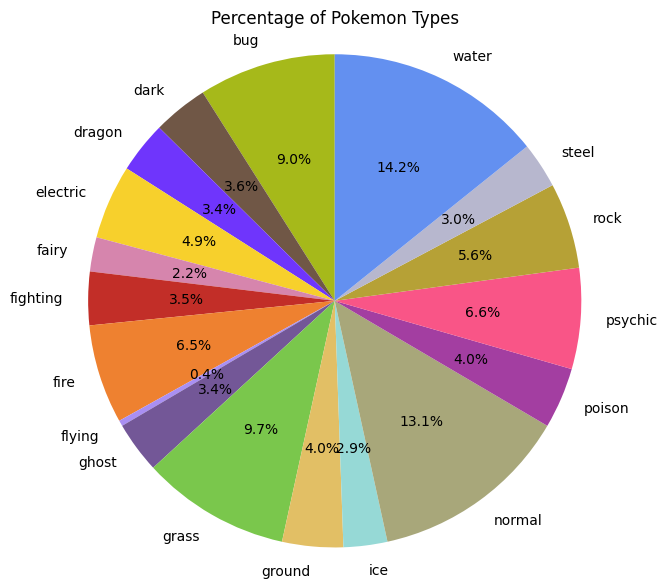

In [20]:

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')  # Ensures pie chart is a circle
plt.title("Percentage of Pokemon Types")


plt.show()



### Histogram Visualization:
- **Matplotlib Method**: `plt.hist()` - this function is used to create a histogram plot showing the distribution of data.
- **Why I chose this**: I used this histogram to show distributions of attack and defense power. This allowed me to better understand what is considered a "good" attack when my son describes his Pokemon battles in play-by-play style. As a bonus, I also created histograms for defense, special attack, and special defense.

In [23]:
df_summary

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,401.000000,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,3.690387,0.087391
std,231.373075,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.930420,0.282583
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,201.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,401.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,601.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,801.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,7.000000,1.000000


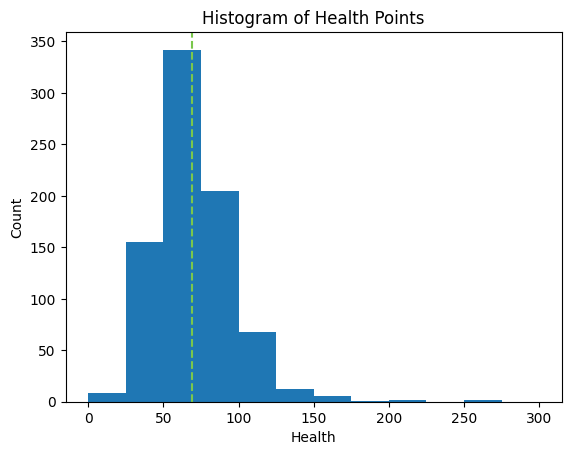

In [21]:
# Task 2: Matplotlib Visualization 2 - Histograms

# Histogram of Health Points
bins=range(0,310,25) 
plt.hist(df['hp'],bins,histtype='bar',rwidth=1.2) 
plt.title('Histogram of Health Points')
plt.xlabel('Health') 
plt.ylabel('Count') 
plt.plot()
plt.axvline(df['hp'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

# Show the histogram
plt.show()


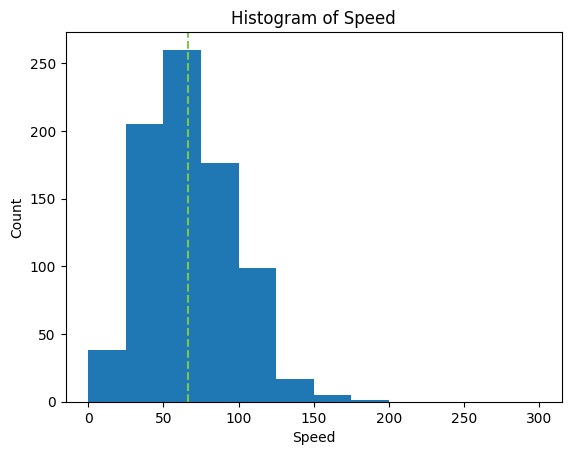

In [24]:
# Histogram of Speed

bins=range(0,310,25) 
plt.hist(df['speed'],bins,histtype='bar',rwidth=1.2) 
plt.title('Histogram of Speed')
plt.xlabel('Speed') 
plt.ylabel('Count') 
plt.plot()
plt.axvline(df['speed'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

# Show the histogram
plt.show()


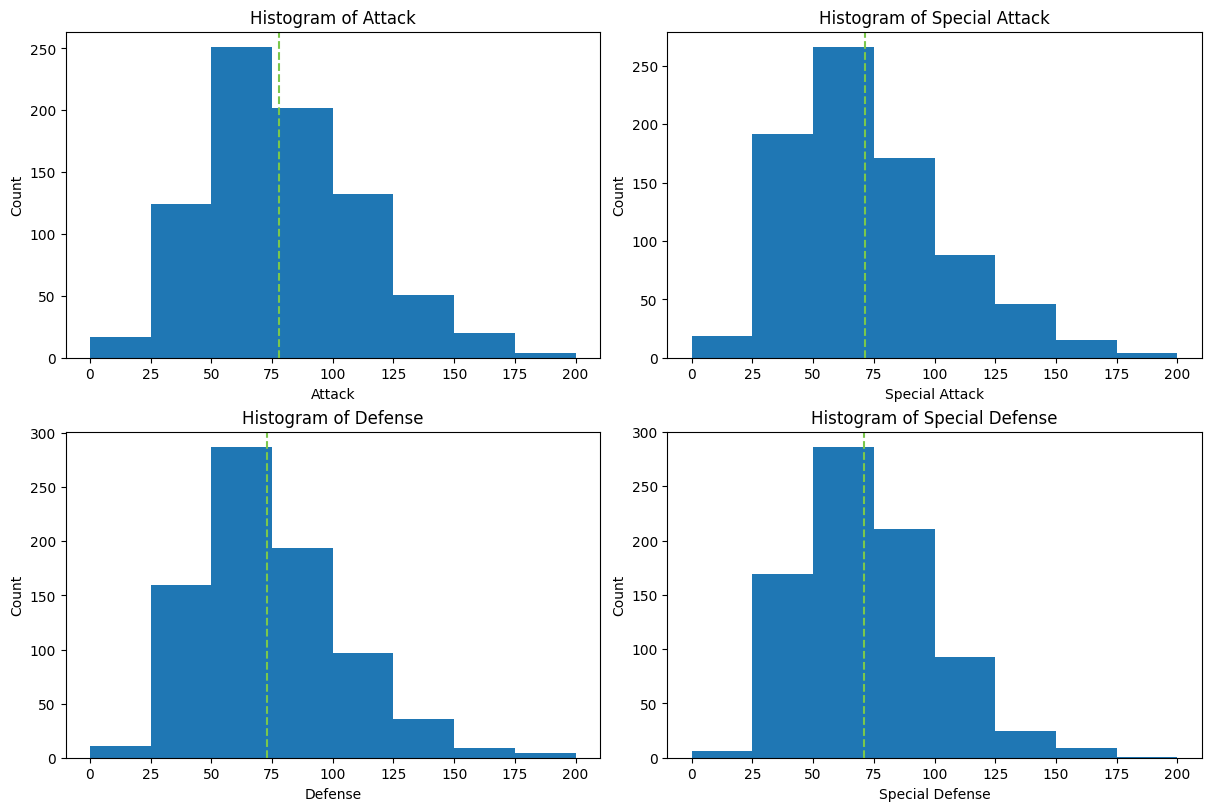

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), layout="constrained")

# Histogram of Attack
bins=range(0,220,25) 
axes[0,0].hist(df['attack'],bins,histtype='bar',rwidth=1.2) 
axes[0,0].set_title('Histogram of Attack') 
axes[0,0].set_xlabel('Attack') 
axes[0,0].set_ylabel('Count') 
axes[0,0].axvline(df['attack'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

# Histogram of Special Attack
bins=range(0,210,25) 
axes[0,1].hist(df['sp_attack'],bins,histtype='bar',rwidth=1.2) 
axes[0,1].set_title('Histogram of Special Attack') 
axes[0,1].set_xlabel('Special Attack') 
axes[0,1].set_ylabel('Count') 
axes[0,1].axvline(df['sp_attack'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

# Histogram of Defense
bins=range(0,220,25) 
axes[1,0].hist(df['defense'],bins,histtype='bar',rwidth=1.2) 
axes[1,0].set_title('Histogram of Defense') 
axes[1,0].set_xlabel('Defense') 
axes[1,0].set_ylabel('Count') 
axes[1,0].axvline(df['defense'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

# Histogram of Special Defense
bins=range(0,220,25) 
axes[1,1].hist(df['sp_defense'],bins,histtype='bar',rwidth=1.2) 
axes[1,1].set_title('Histogram of Special Defense') 
axes[1,1].set_xlabel('Special Defense') 
axes[1,1].set_ylabel('Count') 
axes[1,1].axvline(df['sp_defense'].mean(),linestyle='dashed',color='#7AC74C') #draw a vertical line showing the average Attack value

plt.show()

## Analysis from Matplotlib Visualizations

The matplotlib techniques illuminate interesting information about Pokemon type distribution and attack and defense rates. I was able to see that Grass, Normal, and Water Pokemon are the most numerous types, but I noticed that the Bug type was also prevalent. The rest of the Pokemon types make up small portions of the total Pokemon type population. 

It looks like, based on the Health Points histogram, that Pokemon hp (their ability to sustain attack damage in battle) is fairly centrally concentrated. There are some Pokemon (Mega types) that have really high hp, but most are clustered between 50 and 80 hp.

Finally, I could see that attack and defense 'points' average is roughly equal. If two players have a random deck of pokemon, they'll most likely be fairly evenly matched (this describes my hand whenever I'm brave enough to play against my kids). There is opportunity to strengthen your Pokemon deck by accumulating Pokemon with higher defense and attack techniques. 


## Task 3: Data Science Library of Your Choice

Choose another data science library (e.g., Seaborn, Scikit-Learn, Numpy) and research one method or technique that helps you analyze or visualize your data.




### Violin Plot:
- **Chosen Library**: `Seaborn`
- **Method**: `sns.violin()` - this function is used to create a violin chart.
- **Why I chose this**: My son wanted to better understand what pokemon types will be more powerful for him to train and keep in his pokemon deck. To plot total attack and defense amounts, we'll use violin charts. The violin chart is similar to Tukey's boxplot (Box Plot vs. Violin Plot Comparison, n.d.). The benefit of using the violin plot over the boxplot is that they add the distribution of the sample data (density trace). By default, box plots show data points outside 1.5 * the inter-quartile range as outliers above or below the whiskers whereas violin plots show the whole range of the data. We also added a swarmplot over the top to show the individual Pokemon instances.

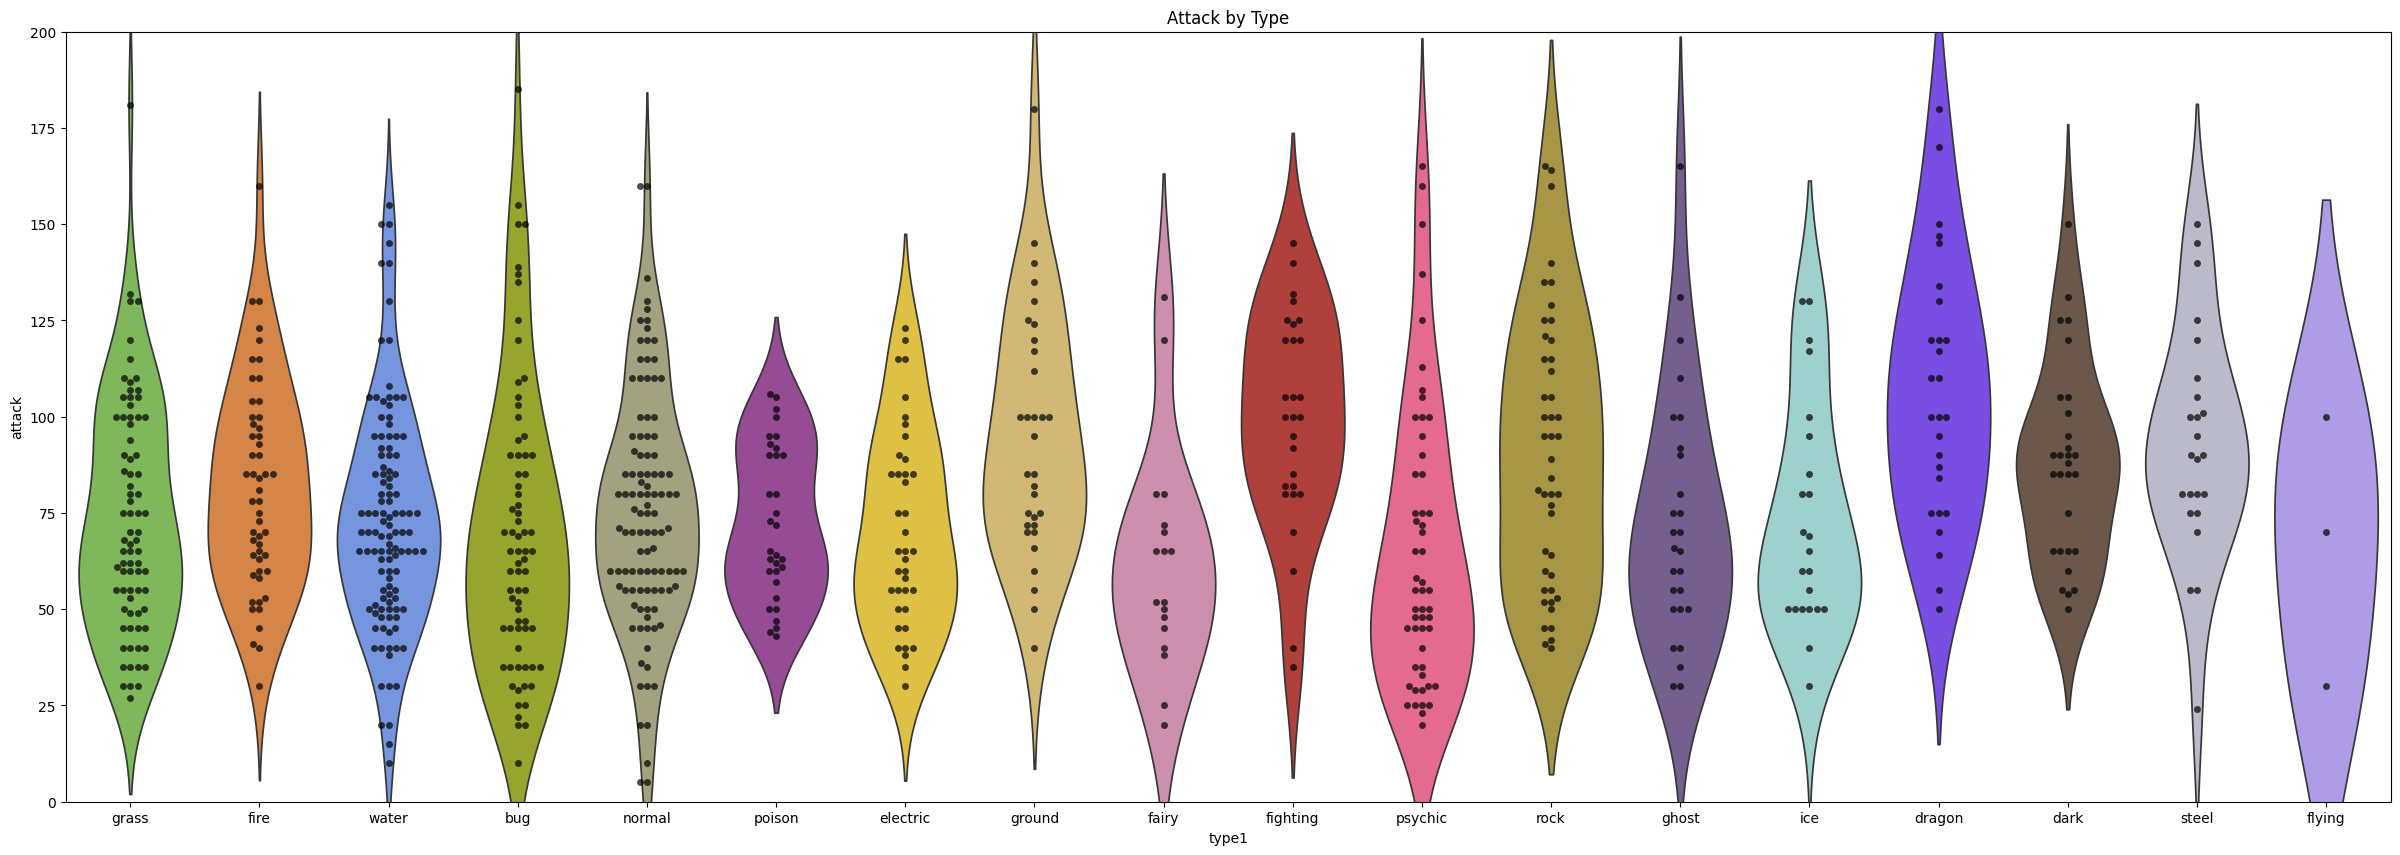

In [26]:

# Task 3: Seaborn - Violin Plots

plt.subplots(figsize = (30,10))
plt.title('Attack by Type')
sns.violinplot(x = "type1", y = "attack", data = df, hue='type1', inner = None, palette=type_colors, legend=False)
sns.swarmplot(x = 'type1', y = 'attack', data = df, color='black', alpha=0.7) # alpha makes the swarmplot dots slightly transparent
plt.ylim(0,200)
plt.show()


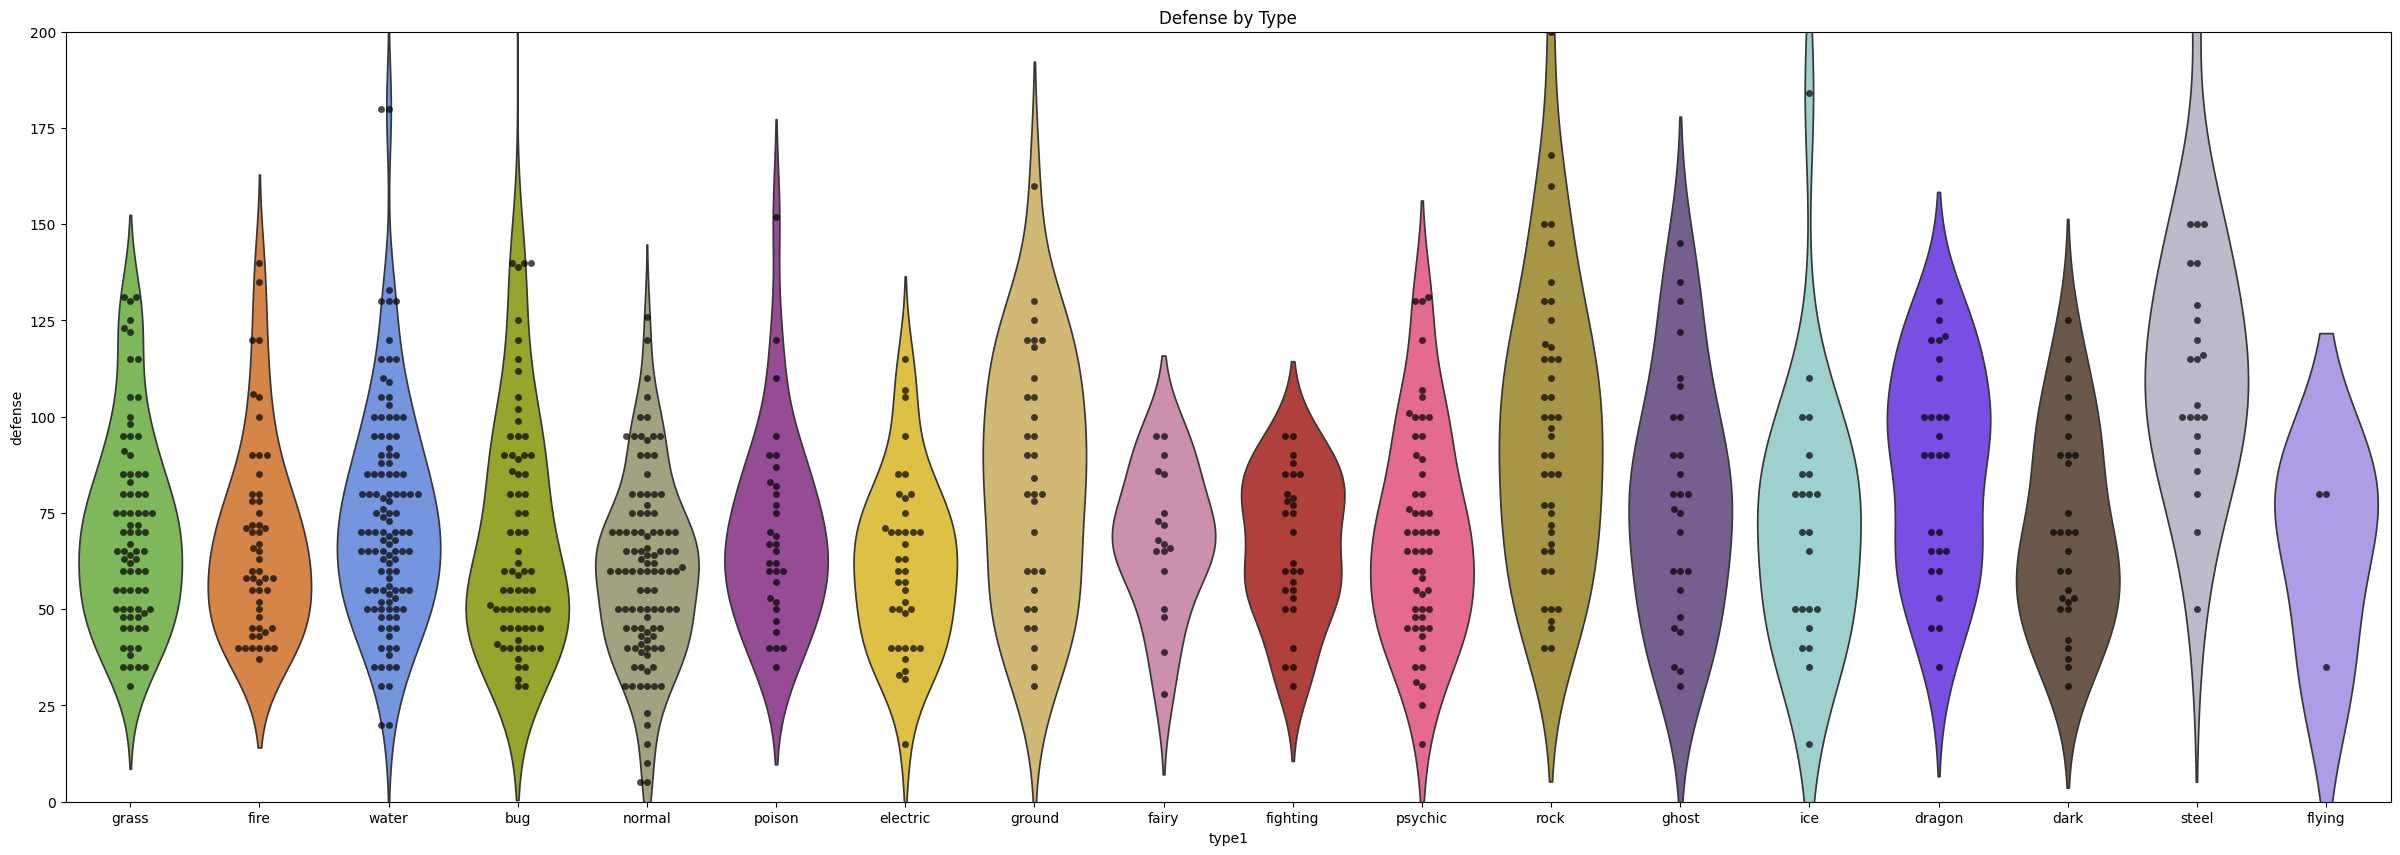

In [27]:
plt.subplots(figsize = (30,10))
plt.title('Defense by Type')
sns.violinplot(x = "type1", y = "defense", data = df, hue='type1', inner = None, palette=type_colors, legend=False)
sns.swarmplot(x = 'type1', y = 'defense', data = df, color='black', alpha=0.7) # alpha makes the swarmplot dots slightly transparent
plt.ylim(0,200)
plt.show()


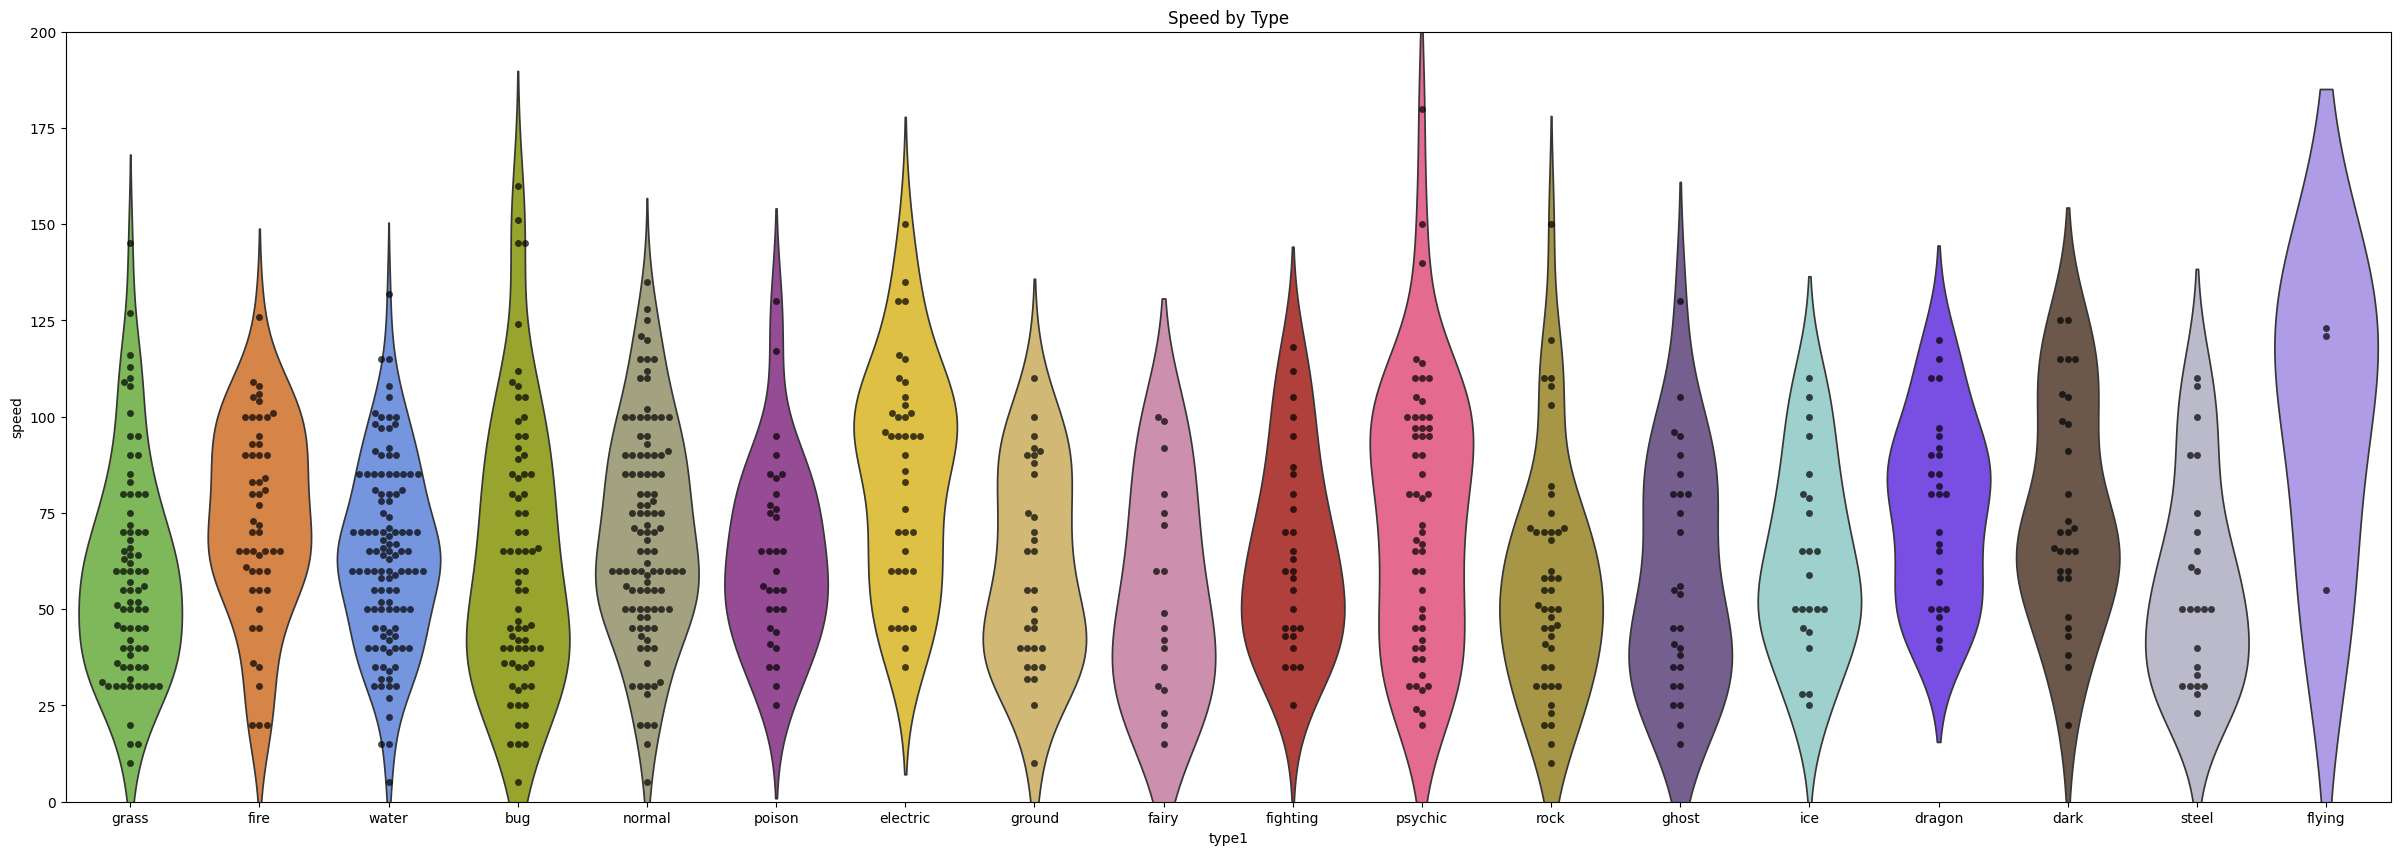

In [28]:
plt.subplots(figsize = (30,10))
plt.title('Speed by Type')
sns.violinplot(x = "type1", y = "speed", data = df, hue='type1', inner = None, palette=type_colors, legend=False)
sns.swarmplot(x = 'type1', y = 'speed', data = df, color='black', alpha=0.7) # alpha makes the swarmplot dots slightly transparent
plt.ylim(0,200)
plt.show()

## Analysis from Seaborn Visualization

The seaborn violin combined with a swarm plot really helped my son and I see how Pokemon levels are distributed by speed, attack, and defense. A few of his Pokemon are 'Legendary,' and so are one of the near-outliers that draw the violin graphs up toward the top of the graph. Some of the really 'basic' Pokemon that you catch in the wild and are nearly useless as far as hp, attack and defense goes are the Pokemon that drag the violins toward the bottom of the graph.

## References

Box plot vs. Violin plot comparison. (n.d.). Matplotlib 3.9.2 Documentation. Retrieved October 30, 2024, from https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html

Pandas.pivot_table. (n.d.). Pandas 2.2.3 Documentation. Retrieved October 30, 2024, from https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html


